In [5]:
import sys
if not '..' in sys.path:
    sys.path.append('..')
import boto3

In [69]:
from analysis import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I'm going to pull two files down from s3 just to test that things look okay.

The first file is one of of the "decoder" matrices used to map EMG into the 2D task dynamics.

The second file is EMG data from one trial of the center_hold task.

(6, 64)
(1205, 64)


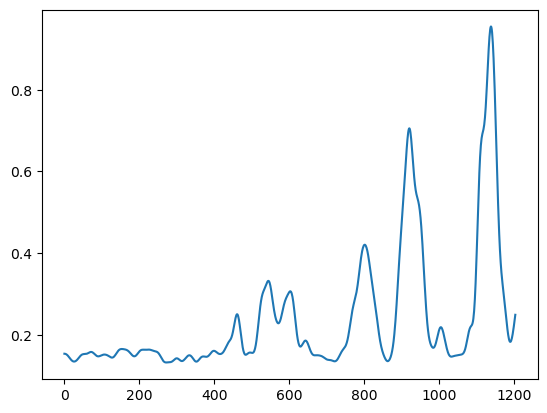

In [85]:
s3_resource = boto3.resource('s3')
s3 = boto3.client("s3")
bucket_name = "motorlearning"
bucket = s3_resource.Bucket(name=bucket_name)

collection_name = "emg_olympics"
subject_name = "alba"
decoder_object_name = f"metadata/{collection_name}/{subject_name}/decoder.bin"
decoder_object = s3.get_object(Bucket='motorlearning', Key=decoder_object_name)

binblob = decoder_object["Body"].read()
decoder_s3 = np.frombuffer(binblob, dtype='<f4').reshape(-1,64)
print(decoder_s3.shape)
# decoder_local = files.load_array_from_disk("/Users/spencer/Documents/motor-control-backup/data/metadata/emg_olympics/alba/decoder.bin").reshape(-1,64)
# print(decoder_s3 == decoder_local)

experiment_name = "center_hold"
session_num = "1"
trial_num = "0"

# filtered EMG
emg_object_name = f"rawdata/{collection_name}/{subject_name}/{experiment_name}/session_{session_num}/{trial_num}_emg_filtered"
matching_emg_objects = s3.list_objects(Bucket='motorlearning', Prefix=emg_object_name)
if len(matching_emg_objects["Contents"]) > 1:
    raise ValueError(f"More than one object found with prefix {emg_object_name}")
emg_object_name = matching_emg_objects["Contents"][0]["Key"]
emg_object = s3.get_object(Bucket="motorlearning", Key=emg_object_name)
binblob = emg_object["Body"].read()
emg_s3 = np.frombuffer(binblob, dtype='<f4').reshape(-1,64)
print(emg_s3.shape)
plt.plot(emg_s3[:,1])
plt.show()

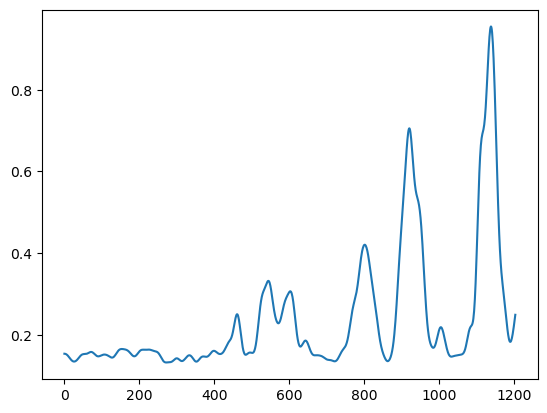

In [82]:
plt.plot(emg_s3[:,1])
plt.show()

(12040, 68)


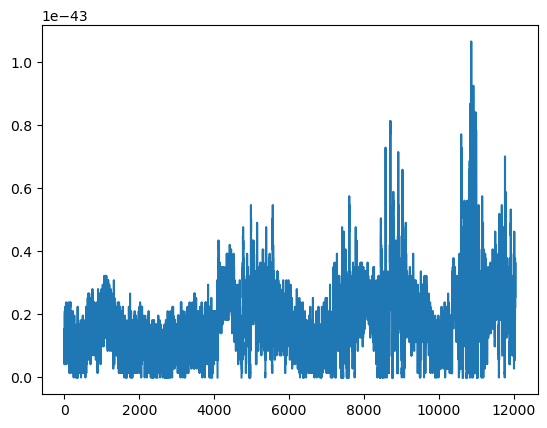

In [87]:
# raw EMG
emg_object_name = f"rawdata/{collection_name}/{subject_name}/{experiment_name}/session_{session_num}/{trial_num}_emg_2021"
matching_emg_objects = s3.list_objects(Bucket='motorlearning', Prefix=emg_object_name)
if len(matching_emg_objects["Contents"]) > 1:
    raise ValueError(f"More than one object found with prefix {emg_object_name}")
emg_object_name = matching_emg_objects["Contents"][0]["Key"]
emg_object = s3.get_object(Bucket="motorlearning", Key=emg_object_name)
binblob = emg_object["Body"].read()
emg_s3 = np.frombuffer(binblob, dtype='<f4').reshape(-1,68)
print(emg_s3.shape)

plt.plot(emg_s3[:,1])
plt.show()